# `mammos_spindynamics` quickstart

`mammos_spindynamics` provides an interface for working with atomistic spin-dynamics simulations and data.

- `db` contains pre-computed temperature-dependent spontaeous magnetization values for several materials
- `uppasd` provides a Python interface to [UppASD](https://github.com/UppASD/UppASD)

In [1]:
import os
import shutil

import mammos_dft
import mammos_spindynamics

os.environ.setdefault("OMP_NUM_THREADS", "1");  # Use only 1 thread (needed for Binder)

## Querying the database – `mammos_spindynamics.db`

Use the following function to get a list of all available materials:

In [2]:
mammos_spindynamics.db.find_materials()

,chemical_formula,space_group_name,space_group_number,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,cell_volume,ICSD_label,OQMD_label,label,source
0,Co2Fe2H4,P6_3/mmc,194,2.645345 Angstrom,2.645314 Angstrom,8.539476 Angstrom,90.0 deg,90.0 deg,120.0 deg,51.751119 Angstrom3,,,0001,Uppsala
1,Y2Ti4Fe18,P4/mbm,127,8.186244 Angstrom,8.186244 Angstrom,4.892896 Angstrom,90.0 deg,90.0 deg,90.0 deg,327.8954234 Angstrom3,,,0002,Uppsala
2,Nd2Fe14B,P42/mnm,136,8.78 Angstrom,8.78 Angstrom,12.12 Angstrom,90.0 deg,90.0 deg,90.0 deg,933.42 Angstrom3,,,0003,https://doi.org/10.1103/PhysRevB.99.214409
3,Fe16N2,?,0,nan Angstrom,nan Angstrom,nan Angstrom,nan deg,nan deg,nan deg,nan Angstrom3,,,0005,Uppsala
4,Ni80Fe20,Pm-3m,221,3.55 Angstrom,3.55 Angstrom,3.55 Angstrom,90.0 deg,90.0 deg,90.0 deg,44.738875 Angstrom3,,,0006,https://doi.org/10.48550/arXiv.1908.08885; spa...
5,Fe3Y,,0,5.088172 Angstrom,5.088172 Angstrom,24.355398 Angstrom,90.0 deg,90.0 deg,120.0 deg,546.071496 Angstrom3,,,0007,Uppsala
6,Fe2.33Ta0.67Y,,0,5.227483 Angstrom,5.227483 Angstrom,25.022642 Angstrom,90.0 deg,90.0 deg,120.0 deg,592.173679 Angstrom3,,,0008,Uppsala


Use the following function to get an object that contains spontaneous magnetization `Ms` at temperatures `T`:

In [3]:
results_spindynamics = mammos_spindynamics.db.get_spontaneous_magnetization("Co2Fe2H4")

The result object provides a function to plot the data for visual inspection:

<Axes: xlabel='Thermodynamic Temperature (K)', ylabel='Spontaneous Magnetization (A / m)'>

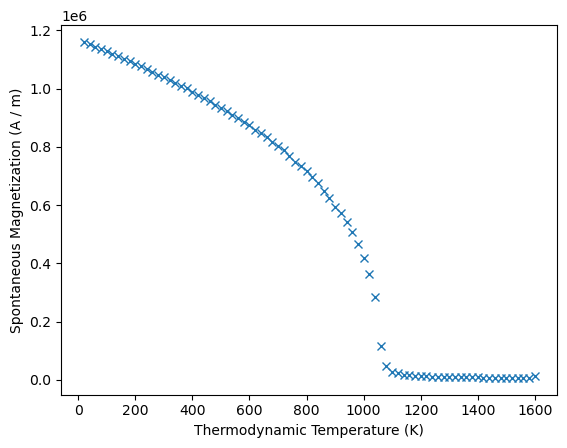

In [4]:
results_spindynamics.plot()

We can access the `Ms` and `T` attributes and get `mammos_entity.Entity` objects:

In [5]:
results_spindynamics.Ms

Entity(ontology_label='SpontaneousMagnetization', value=array([1160762.15152728, 1152764.540031  , 1144332.38021977,
       1136095.4237953 , 1128134.37709324, 1119860.36127139,
       1111776.43793683, 1102918.50364088, 1094392.01798628,
       1085670.06372291, 1076778.81897829, 1067425.28513189,
       1057970.97409635, 1048538.21055569, 1039913.8221449 ,
       1029517.07701433, 1019718.19960104, 1010212.40682623,
       1000827.01766803,  990071.55620798,  977847.7971226 ,
        967365.03404838,  957943.74673504,  945368.08824221,
        933306.33678552,  924042.80638082,  911156.5370935 ,
        898923.20851189,  886959.86875088,  874610.18656417,
        859777.5032481 ,  846674.7339648 ,  833341.85234593,
        817215.36597138,  802915.55664802,  788770.83767705,
        767322.55015624,  749504.37038855,  733715.25355713,
        716555.57268794,  695546.66554008,  675931.69422208,
        650394.96667178,  623964.15571257,  595267.15471822,
        574337.71381396,  540677.01870906,  506480.06838947,
        465749.37929254,  419581.94398809,  363556.9147052 ,
        283780.87532889,  116330.7659029 ,   45920.08375439,
         28204.38382936,   22252.02685696,   18336.06448858,
         16018.35637159,   14232.77360447,   13649.49689592,
         12290.85695223,   11386.3050879 ,   10781.61435564,
         10306.54019184,    9665.93883184,    9395.09234065,
          8975.25861354,    8438.06343775,    8343.59372938,
          8102.70528087,    7747.89846694,    7593.11190125,
          7321.35684554,    7307.02274373,    7047.92251168,
          7129.16483945,    6674.61311621,    6599.17726486,
          6616.13202518,   12484.21016472]), unit='A / m')

In [6]:
results_spindynamics.T

Entity(ontology_label='ThermodynamicTemperature', value=array([  20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.,
        200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,  360.,
        380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,  540.,
        560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,  720.,
        740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,  900.,
        920.,  940.,  960.,  980., 1000., 1020., 1040., 1060., 1080.,
       1100., 1120., 1140., 1160., 1180., 1200., 1220., 1240., 1260.,
       1280., 1300., 1320., 1340., 1360., 1380., 1400., 1420., 1440.,
       1460., 1480., 1500., 1520., 1540., 1560., 1580., 1600.]), unit='K')

To work with the data we can also get it as `pandas.DataFrame`. The dataframe only contains the values (not units).

In [7]:
results_spindynamics.dataframe

,T,Ms
0,20.0,1.160762e+06
1,40.0,1.152765e+06
2,60.0,1.144332e+06
3,80.0,1.136095e+06
4,100.0,1.128134e+06
...,...,...
75,1520.0,7.129165e+03
76,1540.0,6.674613e+03
77,1560.0,6.599177e+03
78,1580.0,6.616132e+03


## Running spindynamics simulations – `mammos_spindynamics.uppasd`

The `uppasd` subpackage provides an Python interface to [UppASD](https://github.com/UppASD/UppASD) (the Uppsala Atomistic Spin Dynamics Software). UppASD has to be installed separately and the executable must be in your `PATH`. The easiest way is to install [UppASD from conda-forge](https://anaconda.org/channels/conda-forge/packages/uppasd/overview) using `pixi` or `conda`.

In this notebook we will show how to run a single simulation. We assume that we have all required input files. [The uppasd notebook](uppasd.ipynb) will explain both creating inputs as well as analyzing the resulting data in more detail.

We will run a simulation for Co2Fe2H4. We can get three of the required input files for this material from `mammos_dft.db`:
- `exchange` containing the exchange coupling constants $J_{ij}$
- `posfile` containing the position of the atoms in the unit cell
- `momfile` containing the magnetic moments of the atoms in the unit cell

We will first copy the three files to the current directory. This most closely resembles the scenario where you may have your own files. We will also rename `exchange` to `jfile` (for no good reason, just to show that we can) and use that name in `inpsd.dat` further down.

In practice, you should avoid this manual copy when using files from the database in `mammos_dft` and instead pass the paths to the three files as additional keyword arguments when creating the simulation object, as explain in [the uppasd notebook](uppasd.ipynb#Single-simulation-starting-from-an-existing-inpsd.dat-file).

To access the data files coming with `mammos_dft.db` we use the `get_uppasd_properties` function:

In [8]:
uppasd_inputs = mammos_dft.db.get_uppasd_properties("Co2Fe2H4")

The returned object gives access to the available files, e.g.:

In [9]:
uppasd_inputs.posfile

PosixPath('/home/mlang/repos/mammos/mammos-devtools/packages/mammos-dft/src/mammos_dft/data/0001/posfile')

In [10]:
# copy files to simulate that we have our own files
shutil.copy(uppasd_inputs.posfile, ".")
shutil.copy(uppasd_inputs.momfile, ".")
shutil.copy(uppasd_inputs.exchange, "./jfile");

In addition we have to create the main input file `inpsd.dat`. For detailed documentation about this file and UppASD in general refer to the [UppASD documentation](https://uppasd.github.io/UppASD-manual/).

In this notebook we create the file using the [writefile magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile), as a user you may already have your own input file, which you can use.

:::{warning}
In order to keep the runtime of this notebook short we use unreasonably small values for `ncell`, `ip_mcnstep` and `mcnstep`.

For production runs you will have to use higher values, suitable starting points could be `ncell 32 32 32`, `ip_mcnstep 25000`, `mcnstep 50000`
:::

In [11]:
%%writefile inpsd.dat
simid Co2Fe2H4

cell  1.000000000000000  -0.500000000182990   0.000000000000000
      0.000000000000000   0.866011964524435   0.000000000000000
      0.000000000000000   0.000000000000000   3.228114436804486

ncell 12  12  12
bc    P P P
sym 0
posfile ./posfile
posfiletype D

initmag 3
momfile ./momfile
maptype 2
exchange ./jfile
ip_mode M
ip_temp 20 
ip_mcnstep 200

mode M
temp 20
mcnstep 200
plotenergy 1
do_proj_avrg Y
do_cumu Y

alat 2.6489381562e-10

Writing inpsd.dat


We pass the input file paths together with paths to the other three files to the `Simulation` class:

In [12]:
sim = mammos_spindynamics.uppasd.Simulation(inpsd="inpsd.dat")

We can now use this object to run a simulation. We need to pass a path to a directory where the output will be written to. Optionally, we can also pass a human-readable description, which will be saved as additional metadata.

In [13]:
result = sim.run(out="Co2Fe2H4-short", description="Short test for Co2Fe2H4")

Running UppASD in Co2Fe2H4-short/0-run ... simulation finished, took 0:00:07


We get an object back, which allows us to inspect simulation output:

In [14]:
result.T

Entity(ontology_label='ThermodynamicTemperature', value=np.float64(20.0), unit='K')

In [15]:
result.Ms

Entity(ontology_label='SpontaneousMagnetization', value=np.float64(1156685.8475534918), unit='A / m')

In [16]:
result.Cv

Entity(ontology_label='IsochoricHeatCapacity', value=np.float64(0.0), unit='J / K')

We can also access some simulation metadata, e.g. the description and the runtime:

In [17]:
result.info()

,name,description,time_elapsed
0,0-run,Short test for Co2Fe2H4,0:00:07
